In [17]:
# Preliminaries 
from mdtb_neocortical import *
from sklearn.decomposition import DictionaryLearning
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'svg' # other available formats are: 'retina', 'png', 'jpeg', 'pdf'


## Quick toy example to test the algorithm
Toy example with U ~ Gamma(1,1)

In [67]:
# Dictonary learning: Toy example with U ~ Gamma(1,1)
V = np.random.normal(0,1,(5,20))
V = V - V.mean(axis=1).reshape((-1,1))
U = np.random.gamma(1,1.0,(100,5))
Y = U @ V
snn = DictionaryLearning(n_components=5, transform_algorithm='lasso_cd',random_state=42,positive_code=True,fit_algorithm='cd')
Uhat = snn.fit_transform(Y)
Vhat = snn.components_

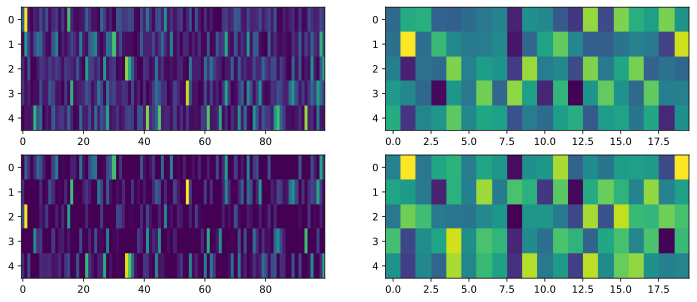

In [68]:
fig = plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.imshow(U.T,aspect='auto')
plt.subplot(2,2,2)
plt.imshow(V,aspect='auto')
plt.subplot(2,2,3)
plt.imshow(Uhat.T,aspect='auto')
plt.subplot(2,2,4)
plt.imshow(Vhat,aspect='auto')


## Now try the same on a hemisphere 

In [69]:
# Load all surfaces 
flatsurf,inflsurf = load_surf()

In [70]:
# Plot s02 task maps 
taskmap,colname,colmap = load_wcon('s02')

In [82]:
# Load the task maps and center 
YL = np.vstack(taskmap[0].agg_data())
YR = np.vstack(taskmap[1].agg_data())
YL = YL-YL.mean(axis=0)
YR = YR-YR.mean(axis=0)
YL[np.isnan(YL)]=0
YR[np.isnan(YR)]=0

In [84]:
snn = DictionaryLearning(n_components=5, transform_algorithm='lasso_cd',random_state=42,positive_code=True,fit_algorithm='cd')
U = snn.fit_transform(YL.T)
V = snn.components_

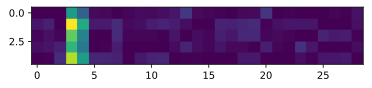

In [86]:
plt.imshow(U.T)